In [19]:

import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt


In [20]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    self.embedding_label = nn.Embedding(10,10)

    self.model = nn.Sequential(
        nn.Linear(794,1024),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.3),

        nn.Linear(1024,512),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.3),

        nn.Linear(512,256),
        nn.LeakyReLU(0.2),
        nn.Dropout(0.3),

        nn.Linear(256,1),
        nn.Sigmoid()
    )
  
  def forward(self,x,labels):
    c = self.embedding_label(labels)

    x = torch.cat([x,c],1)

    return self.model(x)


In [21]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator,self).__init__()

    self.embedding_label = nn.Embedding(10,10)

    self.model = nn.Sequential(
        nn.Linear(110,256),
        nn.LeakyReLU(0.2),

        nn.Linear(256,512),
        nn.LeakyReLU(0.2),

        nn.Linear(512,1024),
        nn.LeakyReLU(0.2),

        nn.Linear(1024,784),
        nn.Tanh()
    )
  
  def forward(self,x,labels):
    c = self.embedding_label(labels)
    x = torch.cat([x,c],1)
    return self.model(x)

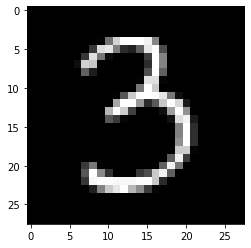

In [22]:
train_data = torchvision.datasets.MNIST(root = 'data', train = True,
                                    download = True, transform = transforms.Compose([transforms.ToTensor(),
                                                                                     transforms.Normalize(mean=[0.5],
                                                                                                          std=[0.5])]))
train_loader = torch.utils.data.DataLoader(train_data,batch_size=100, num_workers=2,shuffle=True)

for x,_ in train_loader:
    plt.imshow(x.numpy()[0][0], cmap='gray')
    break


In [23]:
criterion = nn.BCELoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

D = Discriminator().to(device)
G = Generator().to(device)

print(D)

print(G)

d_optimizer = optim.Adam(D.parameters(), lr = 0.0002)
g_optimizer = optim.Adam(G.parameters(), lr = 0.0002)

cuda
Discriminator(
  (embedding_label): Embedding(10, 10)
  (model): Sequential(
    (0): Linear(in_features=794, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1, bias=True)
    (10): Sigmoid()
  )
)
Generator(
  (embedding_label): Embedding(10, 10)
  (model): Sequential(
    (0): Linear(in_features=110, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024,

Epoch[0/100] Batch 0/600 Loss D: 1.3945 Loss G: 0.6745
Epoch[0/100] Batch 100/600 Loss D: 0.8139 Loss G: 2.4811
Epoch[0/100] Batch 200/600 Loss D: 1.0022 Loss G: 3.2679
Epoch[0/100] Batch 300/600 Loss D: 0.2500 Loss G: 2.4932
Epoch[0/100] Batch 400/600 Loss D: 0.5463 Loss G: 2.8926
Epoch[0/100] Batch 500/600 Loss D: 1.5093 Loss G: 0.5309
3


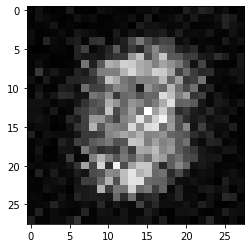

Epoch[1/100] Batch 0/600 Loss D: 2.1074 Loss G: 0.7893
Epoch[1/100] Batch 100/600 Loss D: 0.6009 Loss G: 1.6471
Epoch[1/100] Batch 200/600 Loss D: 0.1121 Loss G: 4.4387
Epoch[1/100] Batch 300/600 Loss D: 1.0962 Loss G: 0.9902
Epoch[1/100] Batch 400/600 Loss D: 0.5223 Loss G: 1.7783
Epoch[1/100] Batch 500/600 Loss D: 0.2070 Loss G: 3.8087
3


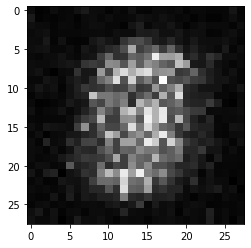

Epoch[2/100] Batch 0/600 Loss D: 1.3288 Loss G: 1.0720
Epoch[2/100] Batch 100/600 Loss D: 0.9732 Loss G: 1.6095
Epoch[2/100] Batch 200/600 Loss D: 1.2466 Loss G: 1.8209
Epoch[2/100] Batch 300/600 Loss D: 1.0045 Loss G: 1.8314
Epoch[2/100] Batch 400/600 Loss D: 1.9210 Loss G: 0.8441
Epoch[2/100] Batch 500/600 Loss D: 0.7796 Loss G: 2.3565
2


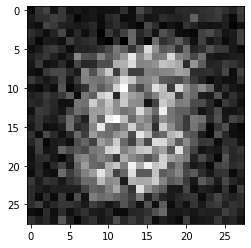

Epoch[3/100] Batch 0/600 Loss D: 0.5623 Loss G: 2.6654
Epoch[3/100] Batch 100/600 Loss D: 0.6773 Loss G: 2.8679
Epoch[3/100] Batch 200/600 Loss D: 0.5600 Loss G: 3.1459
Epoch[3/100] Batch 300/600 Loss D: 0.4178 Loss G: 3.5566
Epoch[3/100] Batch 400/600 Loss D: 0.4518 Loss G: 5.4454
Epoch[3/100] Batch 500/600 Loss D: 0.1520 Loss G: 6.3330
7


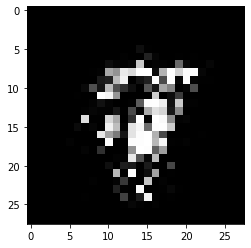

Epoch[4/100] Batch 0/600 Loss D: 0.5776 Loss G: 2.9104
Epoch[4/100] Batch 100/600 Loss D: 0.2793 Loss G: 5.0076
Epoch[4/100] Batch 200/600 Loss D: 0.5393 Loss G: 2.9328
Epoch[4/100] Batch 300/600 Loss D: 0.1198 Loss G: 3.6404
Epoch[4/100] Batch 400/600 Loss D: 0.7039 Loss G: 3.2885
Epoch[4/100] Batch 500/600 Loss D: 0.2823 Loss G: 4.1891
6


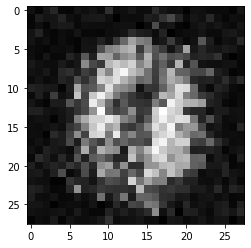

Epoch[5/100] Batch 0/600 Loss D: 0.8777 Loss G: 3.3731
Epoch[5/100] Batch 100/600 Loss D: 0.3025 Loss G: 3.3040
Epoch[5/100] Batch 200/600 Loss D: 0.4122 Loss G: 3.5685
Epoch[5/100] Batch 300/600 Loss D: 0.6548 Loss G: 1.9812
Epoch[5/100] Batch 400/600 Loss D: 0.6646 Loss G: 2.6155
Epoch[5/100] Batch 500/600 Loss D: 0.4168 Loss G: 2.6673
5


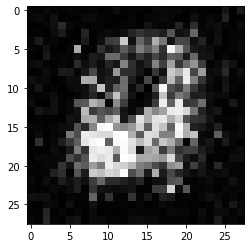

Epoch[6/100] Batch 0/600 Loss D: 0.7551 Loss G: 2.1098
Epoch[6/100] Batch 100/600 Loss D: 0.7320 Loss G: 1.9512
Epoch[6/100] Batch 200/600 Loss D: 0.5364 Loss G: 2.7212
Epoch[6/100] Batch 300/600 Loss D: 0.1383 Loss G: 4.8124
Epoch[6/100] Batch 400/600 Loss D: 0.4718 Loss G: 3.5170
Epoch[6/100] Batch 500/600 Loss D: 0.6194 Loss G: 2.6079
5


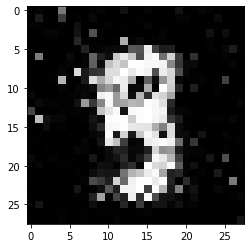

Epoch[7/100] Batch 0/600 Loss D: 0.5864 Loss G: 2.8938
Epoch[7/100] Batch 100/600 Loss D: 0.4283 Loss G: 2.5824
Epoch[7/100] Batch 200/600 Loss D: 0.3995 Loss G: 3.7851
Epoch[7/100] Batch 300/600 Loss D: 0.2412 Loss G: 2.6988
Epoch[7/100] Batch 400/600 Loss D: 0.2454 Loss G: 3.2382
Epoch[7/100] Batch 500/600 Loss D: 0.6133 Loss G: 2.8905
4


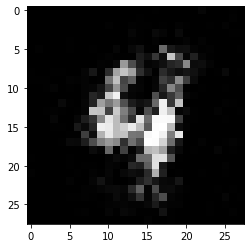

Epoch[8/100] Batch 0/600 Loss D: 0.3275 Loss G: 4.2740
Epoch[8/100] Batch 100/600 Loss D: 0.3922 Loss G: 3.8683
Epoch[8/100] Batch 200/600 Loss D: 0.5340 Loss G: 3.5076
Epoch[8/100] Batch 300/600 Loss D: 0.5191 Loss G: 2.7503
Epoch[8/100] Batch 400/600 Loss D: 0.7395 Loss G: 2.7258
Epoch[8/100] Batch 500/600 Loss D: 0.6265 Loss G: 2.3590
9


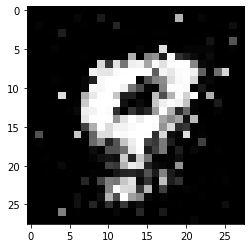

Epoch[9/100] Batch 0/600 Loss D: 0.4154 Loss G: 2.3674
Epoch[9/100] Batch 100/600 Loss D: 0.4319 Loss G: 2.8588
Epoch[9/100] Batch 200/600 Loss D: 0.4886 Loss G: 3.0301
Epoch[9/100] Batch 300/600 Loss D: 0.5605 Loss G: 2.7577
Epoch[9/100] Batch 400/600 Loss D: 0.5152 Loss G: 2.5325
Epoch[9/100] Batch 500/600 Loss D: 0.4998 Loss G: 3.5351
8


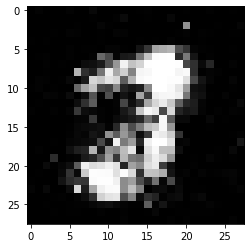

Epoch[10/100] Batch 0/600 Loss D: 0.5864 Loss G: 3.2737
Epoch[10/100] Batch 100/600 Loss D: 0.4352 Loss G: 2.8183
Epoch[10/100] Batch 200/600 Loss D: 0.3622 Loss G: 3.3038
Epoch[10/100] Batch 300/600 Loss D: 0.7109 Loss G: 2.5141
Epoch[10/100] Batch 400/600 Loss D: 0.4779 Loss G: 3.7853
Epoch[10/100] Batch 500/600 Loss D: 0.4094 Loss G: 2.6796
8


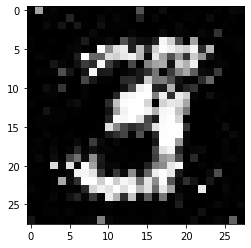

Epoch[11/100] Batch 0/600 Loss D: 0.5860 Loss G: 2.3472
Epoch[11/100] Batch 100/600 Loss D: 0.6611 Loss G: 3.1392
Epoch[11/100] Batch 200/600 Loss D: 0.6050 Loss G: 2.4102
Epoch[11/100] Batch 300/600 Loss D: 0.3936 Loss G: 2.2548
Epoch[11/100] Batch 400/600 Loss D: 0.5886 Loss G: 2.5822
Epoch[11/100] Batch 500/600 Loss D: 0.6765 Loss G: 2.1301
7


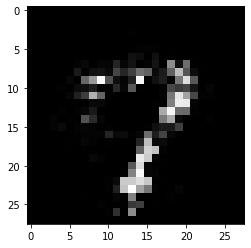

Epoch[12/100] Batch 0/600 Loss D: 0.4309 Loss G: 3.2431
Epoch[12/100] Batch 100/600 Loss D: 0.5452 Loss G: 2.4343
Epoch[12/100] Batch 200/600 Loss D: 0.6945 Loss G: 3.1847
Epoch[12/100] Batch 300/600 Loss D: 0.4514 Loss G: 2.2107
Epoch[12/100] Batch 400/600 Loss D: 0.5034 Loss G: 2.9989
Epoch[12/100] Batch 500/600 Loss D: 0.5908 Loss G: 2.3690
5


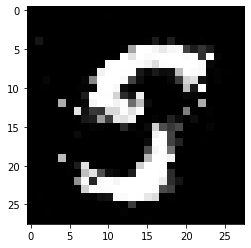

Epoch[13/100] Batch 0/600 Loss D: 0.7010 Loss G: 2.3572
Epoch[13/100] Batch 100/600 Loss D: 0.6304 Loss G: 2.3374
Epoch[13/100] Batch 200/600 Loss D: 0.8099 Loss G: 1.6879
Epoch[13/100] Batch 300/600 Loss D: 0.7320 Loss G: 2.3308
Epoch[13/100] Batch 400/600 Loss D: 0.4680 Loss G: 2.8631
Epoch[13/100] Batch 500/600 Loss D: 0.8781 Loss G: 1.9776
2


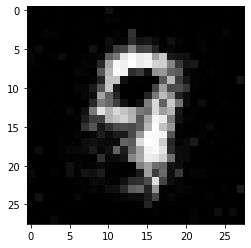

Epoch[14/100] Batch 0/600 Loss D: 0.7843 Loss G: 1.6316
Epoch[14/100] Batch 100/600 Loss D: 0.5877 Loss G: 2.3991
Epoch[14/100] Batch 200/600 Loss D: 0.7259 Loss G: 2.0687
Epoch[14/100] Batch 300/600 Loss D: 0.7284 Loss G: 1.9746
Epoch[14/100] Batch 400/600 Loss D: 0.6998 Loss G: 2.8755
Epoch[14/100] Batch 500/600 Loss D: 0.6488 Loss G: 2.5302
9


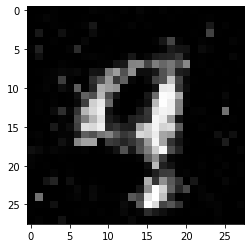

Epoch[15/100] Batch 0/600 Loss D: 0.6912 Loss G: 2.0920
Epoch[15/100] Batch 100/600 Loss D: 0.5337 Loss G: 2.3357
Epoch[15/100] Batch 200/600 Loss D: 0.7204 Loss G: 1.7576
Epoch[15/100] Batch 300/600 Loss D: 1.0459 Loss G: 1.7376
Epoch[15/100] Batch 400/600 Loss D: 0.6809 Loss G: 2.5884
Epoch[15/100] Batch 500/600 Loss D: 0.5804 Loss G: 2.0697
3


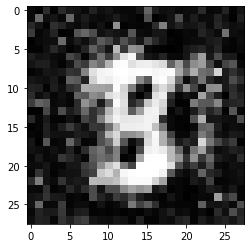

Epoch[16/100] Batch 0/600 Loss D: 0.6736 Loss G: 2.4059
Epoch[16/100] Batch 100/600 Loss D: 0.8237 Loss G: 2.1675
Epoch[16/100] Batch 200/600 Loss D: 0.7850 Loss G: 2.0270
Epoch[16/100] Batch 300/600 Loss D: 0.8742 Loss G: 2.0648
Epoch[16/100] Batch 400/600 Loss D: 0.8064 Loss G: 1.4811
Epoch[16/100] Batch 500/600 Loss D: 0.7619 Loss G: 1.9214
6


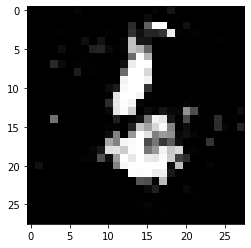

Epoch[17/100] Batch 0/600 Loss D: 0.8941 Loss G: 2.1898
Epoch[17/100] Batch 100/600 Loss D: 0.9908 Loss G: 1.6841
Epoch[17/100] Batch 200/600 Loss D: 0.7585 Loss G: 2.2551
Epoch[17/100] Batch 300/600 Loss D: 0.9013 Loss G: 1.4492
Epoch[17/100] Batch 400/600 Loss D: 1.1298 Loss G: 1.4497
Epoch[17/100] Batch 500/600 Loss D: 0.7469 Loss G: 1.8964
4


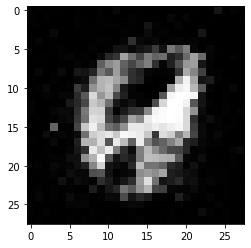

Epoch[18/100] Batch 0/600 Loss D: 0.6452 Loss G: 1.8054
Epoch[18/100] Batch 100/600 Loss D: 0.9090 Loss G: 1.8378
Epoch[18/100] Batch 200/600 Loss D: 0.7478 Loss G: 2.2496
Epoch[18/100] Batch 300/600 Loss D: 0.8489 Loss G: 2.1087
Epoch[18/100] Batch 400/600 Loss D: 0.8561 Loss G: 1.7246
Epoch[18/100] Batch 500/600 Loss D: 0.8982 Loss G: 1.3545
8


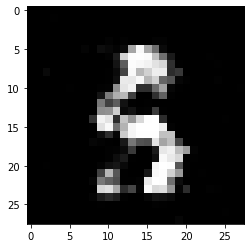

Epoch[19/100] Batch 0/600 Loss D: 0.7910 Loss G: 1.4950
Epoch[19/100] Batch 100/600 Loss D: 0.8996 Loss G: 2.0505
Epoch[19/100] Batch 200/600 Loss D: 1.1021 Loss G: 1.8780
Epoch[19/100] Batch 300/600 Loss D: 1.2151 Loss G: 1.7914
Epoch[19/100] Batch 400/600 Loss D: 0.9175 Loss G: 1.3113
Epoch[19/100] Batch 500/600 Loss D: 0.8420 Loss G: 1.9123
5


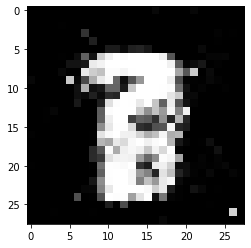

Epoch[20/100] Batch 0/600 Loss D: 0.9873 Loss G: 1.8693
Epoch[20/100] Batch 100/600 Loss D: 0.8340 Loss G: 2.2045
Epoch[20/100] Batch 200/600 Loss D: 1.0711 Loss G: 1.3211
Epoch[20/100] Batch 300/600 Loss D: 0.7982 Loss G: 1.1868
Epoch[20/100] Batch 400/600 Loss D: 0.9768 Loss G: 1.9418
Epoch[20/100] Batch 500/600 Loss D: 0.6572 Loss G: 1.9936
9


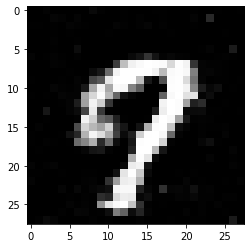

Epoch[21/100] Batch 0/600 Loss D: 0.8766 Loss G: 1.7425
Epoch[21/100] Batch 100/600 Loss D: 0.8404 Loss G: 1.6543
Epoch[21/100] Batch 200/600 Loss D: 0.7960 Loss G: 1.7893
Epoch[21/100] Batch 300/600 Loss D: 0.7758 Loss G: 1.8745
Epoch[21/100] Batch 400/600 Loss D: 0.9111 Loss G: 1.9685
Epoch[21/100] Batch 500/600 Loss D: 0.9082 Loss G: 1.8930
9


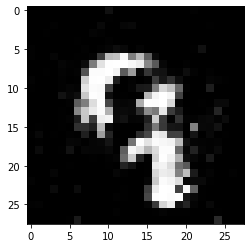

Epoch[22/100] Batch 0/600 Loss D: 0.9723 Loss G: 1.8908
Epoch[22/100] Batch 100/600 Loss D: 0.9483 Loss G: 1.5868
Epoch[22/100] Batch 200/600 Loss D: 1.0321 Loss G: 1.4315
Epoch[22/100] Batch 300/600 Loss D: 0.9252 Loss G: 1.7394
Epoch[22/100] Batch 400/600 Loss D: 0.9632 Loss G: 1.7702
Epoch[22/100] Batch 500/600 Loss D: 0.9853 Loss G: 1.4039
2


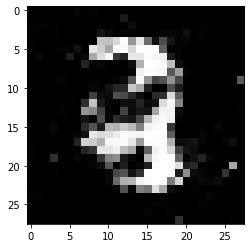

Epoch[23/100] Batch 0/600 Loss D: 0.9078 Loss G: 1.3666
Epoch[23/100] Batch 100/600 Loss D: 0.9352 Loss G: 1.2541
Epoch[23/100] Batch 200/600 Loss D: 1.0416 Loss G: 1.6298
Epoch[23/100] Batch 300/600 Loss D: 1.1322 Loss G: 1.5375
Epoch[23/100] Batch 400/600 Loss D: 0.9837 Loss G: 2.2899
Epoch[23/100] Batch 500/600 Loss D: 0.9207 Loss G: 1.1499
1


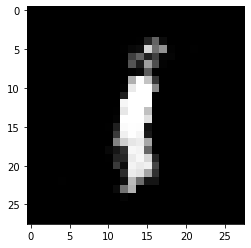

Epoch[24/100] Batch 0/600 Loss D: 0.8472 Loss G: 1.5107
Epoch[24/100] Batch 100/600 Loss D: 0.8673 Loss G: 1.4551
Epoch[24/100] Batch 200/600 Loss D: 0.8959 Loss G: 1.5108
Epoch[24/100] Batch 300/600 Loss D: 0.7631 Loss G: 1.7928
Epoch[24/100] Batch 400/600 Loss D: 0.9122 Loss G: 1.4094
Epoch[24/100] Batch 500/600 Loss D: 1.0240 Loss G: 1.7186
5


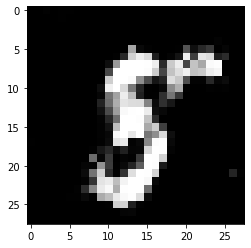

Epoch[25/100] Batch 0/600 Loss D: 0.9233 Loss G: 1.5538
Epoch[25/100] Batch 100/600 Loss D: 0.8663 Loss G: 1.5335
Epoch[25/100] Batch 200/600 Loss D: 0.9652 Loss G: 1.4103
Epoch[25/100] Batch 300/600 Loss D: 0.8299 Loss G: 1.3391
Epoch[25/100] Batch 400/600 Loss D: 1.1736 Loss G: 1.5779
Epoch[25/100] Batch 500/600 Loss D: 0.8903 Loss G: 2.0989
1


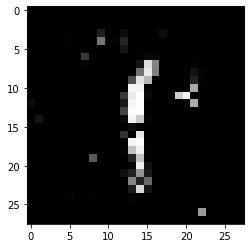

Epoch[26/100] Batch 0/600 Loss D: 0.8611 Loss G: 1.5100
Epoch[26/100] Batch 100/600 Loss D: 1.0753 Loss G: 1.2326
Epoch[26/100] Batch 200/600 Loss D: 1.0665 Loss G: 1.4436
Epoch[26/100] Batch 300/600 Loss D: 0.9121 Loss G: 1.7771
Epoch[26/100] Batch 400/600 Loss D: 1.0720 Loss G: 1.2737
Epoch[26/100] Batch 500/600 Loss D: 1.0621 Loss G: 1.3289
5


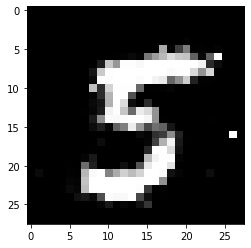

Epoch[27/100] Batch 0/600 Loss D: 1.0485 Loss G: 1.4896
Epoch[27/100] Batch 100/600 Loss D: 1.0804 Loss G: 1.3889
Epoch[27/100] Batch 200/600 Loss D: 0.9330 Loss G: 1.4616
Epoch[27/100] Batch 300/600 Loss D: 1.1690 Loss G: 1.2571
Epoch[27/100] Batch 400/600 Loss D: 0.9654 Loss G: 1.3222
Epoch[27/100] Batch 500/600 Loss D: 0.9150 Loss G: 1.4201
2


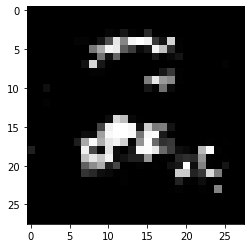

Epoch[28/100] Batch 0/600 Loss D: 0.9836 Loss G: 1.4222
Epoch[28/100] Batch 100/600 Loss D: 0.9266 Loss G: 1.3012
Epoch[28/100] Batch 200/600 Loss D: 0.9504 Loss G: 1.1080
Epoch[28/100] Batch 300/600 Loss D: 0.9632 Loss G: 1.7508
Epoch[28/100] Batch 400/600 Loss D: 1.1295 Loss G: 1.4114
Epoch[28/100] Batch 500/600 Loss D: 1.1653 Loss G: 1.4233
3


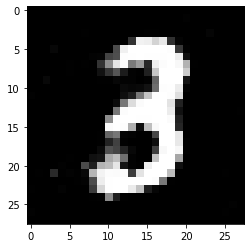

Epoch[29/100] Batch 0/600 Loss D: 1.0074 Loss G: 1.3521
Epoch[29/100] Batch 100/600 Loss D: 1.0403 Loss G: 1.4431
Epoch[29/100] Batch 200/600 Loss D: 1.0635 Loss G: 1.2503
Epoch[29/100] Batch 300/600 Loss D: 1.0605 Loss G: 1.0748
Epoch[29/100] Batch 400/600 Loss D: 0.9766 Loss G: 1.5807
Epoch[29/100] Batch 500/600 Loss D: 0.9975 Loss G: 1.2550
2


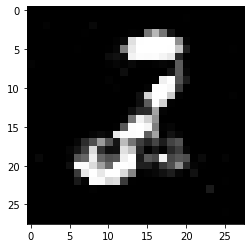

Epoch[30/100] Batch 0/600 Loss D: 0.9909 Loss G: 1.1547
Epoch[30/100] Batch 100/600 Loss D: 1.0664 Loss G: 1.1473
Epoch[30/100] Batch 200/600 Loss D: 1.0459 Loss G: 1.2688
Epoch[30/100] Batch 300/600 Loss D: 1.1112 Loss G: 1.2108
Epoch[30/100] Batch 400/600 Loss D: 1.1045 Loss G: 1.3794
Epoch[30/100] Batch 500/600 Loss D: 1.1755 Loss G: 1.1474
1


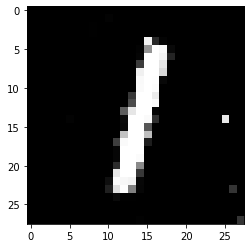

Epoch[31/100] Batch 0/600 Loss D: 1.0977 Loss G: 1.1306
Epoch[31/100] Batch 100/600 Loss D: 1.0924 Loss G: 1.3146
Epoch[31/100] Batch 200/600 Loss D: 0.9804 Loss G: 1.6489
Epoch[31/100] Batch 300/600 Loss D: 1.0588 Loss G: 1.3365
Epoch[31/100] Batch 400/600 Loss D: 1.0290 Loss G: 1.5844
Epoch[31/100] Batch 500/600 Loss D: 0.9698 Loss G: 1.4421
7


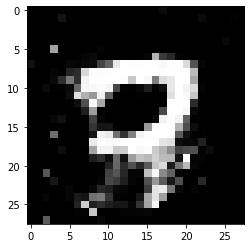

Epoch[32/100] Batch 0/600 Loss D: 1.0481 Loss G: 1.3226
Epoch[32/100] Batch 100/600 Loss D: 0.9533 Loss G: 1.2173
Epoch[32/100] Batch 200/600 Loss D: 1.1287 Loss G: 1.4951
Epoch[32/100] Batch 300/600 Loss D: 1.1563 Loss G: 1.2031
Epoch[32/100] Batch 400/600 Loss D: 1.0441 Loss G: 1.0841
Epoch[32/100] Batch 500/600 Loss D: 0.9332 Loss G: 1.4009
4


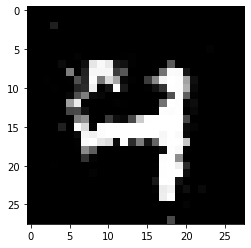

Epoch[33/100] Batch 0/600 Loss D: 0.9426 Loss G: 1.3057
Epoch[33/100] Batch 100/600 Loss D: 1.1196 Loss G: 1.3268
Epoch[33/100] Batch 200/600 Loss D: 1.1093 Loss G: 1.4069
Epoch[33/100] Batch 300/600 Loss D: 1.0363 Loss G: 1.4168
Epoch[33/100] Batch 400/600 Loss D: 1.2798 Loss G: 0.9595
Epoch[33/100] Batch 500/600 Loss D: 1.1363 Loss G: 1.0378
9


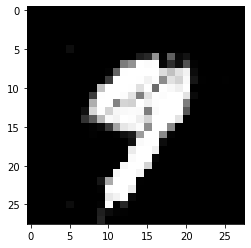

Epoch[34/100] Batch 0/600 Loss D: 1.3198 Loss G: 1.0199
Epoch[34/100] Batch 100/600 Loss D: 1.1532 Loss G: 1.1272
Epoch[34/100] Batch 200/600 Loss D: 1.2156 Loss G: 1.1896
Epoch[34/100] Batch 300/600 Loss D: 1.0638 Loss G: 1.2828
Epoch[34/100] Batch 400/600 Loss D: 1.1273 Loss G: 1.2495
Epoch[34/100] Batch 500/600 Loss D: 1.0633 Loss G: 1.2993
5


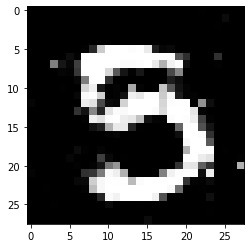

Epoch[35/100] Batch 0/600 Loss D: 1.1489 Loss G: 1.1415
Epoch[35/100] Batch 100/600 Loss D: 0.9457 Loss G: 1.0598
Epoch[35/100] Batch 200/600 Loss D: 1.0186 Loss G: 1.1783
Epoch[35/100] Batch 300/600 Loss D: 1.0997 Loss G: 1.3260
Epoch[35/100] Batch 400/600 Loss D: 1.1970 Loss G: 1.2999
Epoch[35/100] Batch 500/600 Loss D: 1.1612 Loss G: 1.2331
3


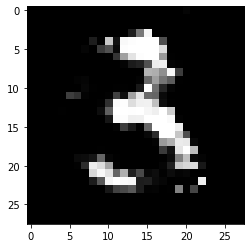

Epoch[36/100] Batch 0/600 Loss D: 1.2126 Loss G: 0.9945
Epoch[36/100] Batch 100/600 Loss D: 1.2116 Loss G: 1.2253
Epoch[36/100] Batch 200/600 Loss D: 1.1615 Loss G: 1.2839
Epoch[36/100] Batch 300/600 Loss D: 1.0334 Loss G: 1.2200
Epoch[36/100] Batch 400/600 Loss D: 1.0902 Loss G: 1.1412
Epoch[36/100] Batch 500/600 Loss D: 1.1144 Loss G: 1.2213
1


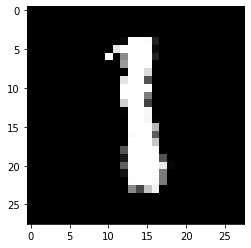

Epoch[37/100] Batch 0/600 Loss D: 1.1101 Loss G: 1.1694
Epoch[37/100] Batch 100/600 Loss D: 1.1225 Loss G: 1.1243
Epoch[37/100] Batch 200/600 Loss D: 1.2158 Loss G: 1.2855
Epoch[37/100] Batch 300/600 Loss D: 1.0690 Loss G: 1.0643
Epoch[37/100] Batch 400/600 Loss D: 1.0618 Loss G: 1.2344
Epoch[37/100] Batch 500/600 Loss D: 1.2500 Loss G: 1.1720
8


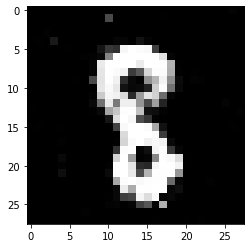

Epoch[38/100] Batch 0/600 Loss D: 1.2299 Loss G: 0.9174
Epoch[38/100] Batch 100/600 Loss D: 1.0376 Loss G: 1.2772
Epoch[38/100] Batch 200/600 Loss D: 1.0599 Loss G: 1.2150
Epoch[38/100] Batch 300/600 Loss D: 1.1850 Loss G: 1.1107
Epoch[38/100] Batch 400/600 Loss D: 1.2117 Loss G: 1.2659
Epoch[38/100] Batch 500/600 Loss D: 1.1510 Loss G: 1.3433
7


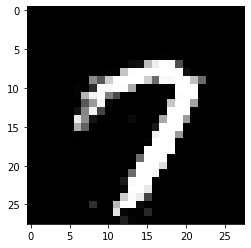

Epoch[39/100] Batch 0/600 Loss D: 1.2416 Loss G: 0.9733
Epoch[39/100] Batch 100/600 Loss D: 1.2588 Loss G: 1.2275
Epoch[39/100] Batch 200/600 Loss D: 1.2323 Loss G: 1.3557
Epoch[39/100] Batch 300/600 Loss D: 1.1533 Loss G: 1.1304
Epoch[39/100] Batch 400/600 Loss D: 1.0905 Loss G: 1.1316
Epoch[39/100] Batch 500/600 Loss D: 1.2256 Loss G: 1.1907
5


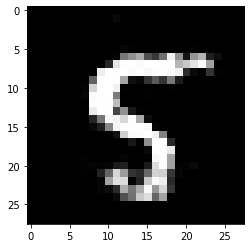

Epoch[40/100] Batch 0/600 Loss D: 1.2219 Loss G: 0.9130
Epoch[40/100] Batch 100/600 Loss D: 1.0927 Loss G: 1.0669
Epoch[40/100] Batch 200/600 Loss D: 1.2699 Loss G: 1.0103
Epoch[40/100] Batch 300/600 Loss D: 1.1793 Loss G: 1.1440
Epoch[40/100] Batch 400/600 Loss D: 1.1127 Loss G: 1.1264
Epoch[40/100] Batch 500/600 Loss D: 1.1814 Loss G: 1.1828
6


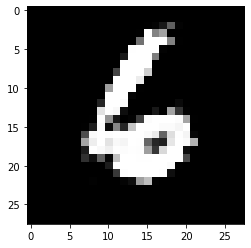

Epoch[41/100] Batch 0/600 Loss D: 1.1735 Loss G: 1.2441
Epoch[41/100] Batch 100/600 Loss D: 1.3357 Loss G: 0.9354
Epoch[41/100] Batch 200/600 Loss D: 1.1622 Loss G: 1.0684
Epoch[41/100] Batch 300/600 Loss D: 1.2003 Loss G: 0.9351
Epoch[41/100] Batch 400/600 Loss D: 1.1388 Loss G: 1.0096
Epoch[41/100] Batch 500/600 Loss D: 1.2345 Loss G: 1.1035
9


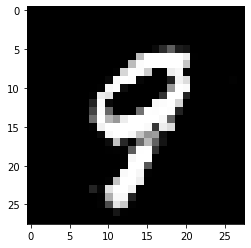

Epoch[42/100] Batch 0/600 Loss D: 1.1183 Loss G: 0.9808
Epoch[42/100] Batch 100/600 Loss D: 1.0641 Loss G: 1.0308
Epoch[42/100] Batch 200/600 Loss D: 1.1259 Loss G: 0.9896
Epoch[42/100] Batch 300/600 Loss D: 1.3168 Loss G: 0.9157
Epoch[42/100] Batch 400/600 Loss D: 1.2526 Loss G: 1.0455
Epoch[42/100] Batch 500/600 Loss D: 1.2443 Loss G: 1.0356
4


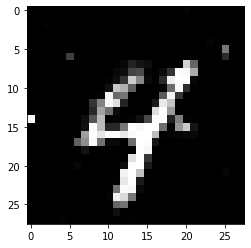

Epoch[43/100] Batch 0/600 Loss D: 1.0664 Loss G: 1.1633
Epoch[43/100] Batch 100/600 Loss D: 1.1741 Loss G: 0.9719
Epoch[43/100] Batch 200/600 Loss D: 1.1877 Loss G: 1.0245
Epoch[43/100] Batch 300/600 Loss D: 1.2519 Loss G: 0.9692
Epoch[43/100] Batch 400/600 Loss D: 1.2047 Loss G: 1.0122
Epoch[43/100] Batch 500/600 Loss D: 1.2159 Loss G: 0.8836
9


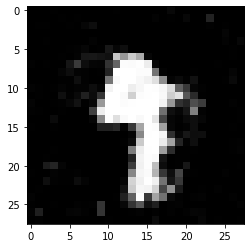

Epoch[44/100] Batch 0/600 Loss D: 1.1667 Loss G: 1.0560
Epoch[44/100] Batch 100/600 Loss D: 1.2140 Loss G: 1.1270
Epoch[44/100] Batch 200/600 Loss D: 1.2601 Loss G: 1.0013
Epoch[44/100] Batch 300/600 Loss D: 1.2797 Loss G: 0.8675
Epoch[44/100] Batch 400/600 Loss D: 1.2442 Loss G: 0.9332
Epoch[44/100] Batch 500/600 Loss D: 1.3260 Loss G: 0.9251
3


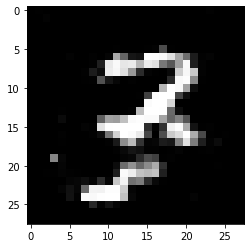

Epoch[45/100] Batch 0/600 Loss D: 1.1217 Loss G: 0.9033
Epoch[45/100] Batch 100/600 Loss D: 1.1355 Loss G: 1.0653
Epoch[45/100] Batch 200/600 Loss D: 1.3592 Loss G: 0.9459
Epoch[45/100] Batch 300/600 Loss D: 1.1222 Loss G: 1.2055
Epoch[45/100] Batch 400/600 Loss D: 1.2352 Loss G: 1.0209
Epoch[45/100] Batch 500/600 Loss D: 1.2289 Loss G: 1.0863
5


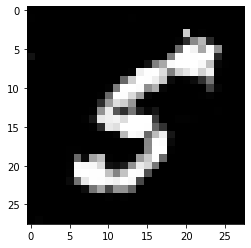

Epoch[46/100] Batch 0/600 Loss D: 1.0926 Loss G: 1.1073
Epoch[46/100] Batch 100/600 Loss D: 1.1583 Loss G: 1.1062
Epoch[46/100] Batch 200/600 Loss D: 1.1813 Loss G: 1.0632
Epoch[46/100] Batch 300/600 Loss D: 1.2207 Loss G: 1.0471
Epoch[46/100] Batch 400/600 Loss D: 1.2614 Loss G: 0.9649
Epoch[46/100] Batch 500/600 Loss D: 1.2746 Loss G: 1.1832
8


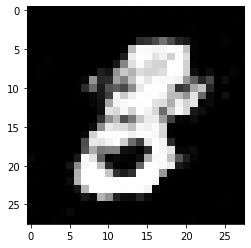

Epoch[47/100] Batch 0/600 Loss D: 1.1430 Loss G: 1.0260
Epoch[47/100] Batch 100/600 Loss D: 1.1755 Loss G: 1.1457
Epoch[47/100] Batch 200/600 Loss D: 1.1989 Loss G: 1.1440
Epoch[47/100] Batch 300/600 Loss D: 1.1312 Loss G: 1.1076
Epoch[47/100] Batch 400/600 Loss D: 1.1789 Loss G: 1.0638
Epoch[47/100] Batch 500/600 Loss D: 1.1881 Loss G: 0.8606
3


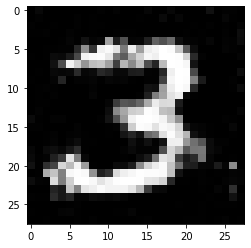

Epoch[48/100] Batch 0/600 Loss D: 1.2429 Loss G: 0.9655
Epoch[48/100] Batch 100/600 Loss D: 1.1992 Loss G: 0.9486
Epoch[48/100] Batch 200/600 Loss D: 1.2281 Loss G: 0.9265
Epoch[48/100] Batch 300/600 Loss D: 1.1431 Loss G: 1.2264
Epoch[48/100] Batch 400/600 Loss D: 1.2190 Loss G: 0.9538
Epoch[48/100] Batch 500/600 Loss D: 1.2325 Loss G: 1.0313
0


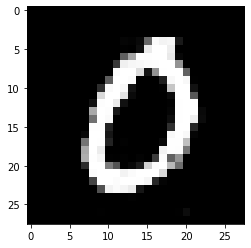

Epoch[49/100] Batch 0/600 Loss D: 1.3147 Loss G: 0.8648
Epoch[49/100] Batch 100/600 Loss D: 1.2017 Loss G: 1.0068
Epoch[49/100] Batch 200/600 Loss D: 1.0805 Loss G: 0.9928
Epoch[49/100] Batch 300/600 Loss D: 1.2368 Loss G: 1.1808
Epoch[49/100] Batch 400/600 Loss D: 1.1520 Loss G: 0.9894
Epoch[49/100] Batch 500/600 Loss D: 1.1373 Loss G: 1.1194
7


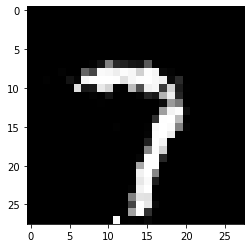

Epoch[50/100] Batch 0/600 Loss D: 1.0349 Loss G: 1.2113
Epoch[50/100] Batch 100/600 Loss D: 1.1143 Loss G: 1.1602
Epoch[50/100] Batch 200/600 Loss D: 1.1394 Loss G: 0.9214
Epoch[50/100] Batch 300/600 Loss D: 1.2091 Loss G: 1.0550
Epoch[50/100] Batch 400/600 Loss D: 1.2037 Loss G: 1.1570
Epoch[50/100] Batch 500/600 Loss D: 1.2442 Loss G: 1.1589
8


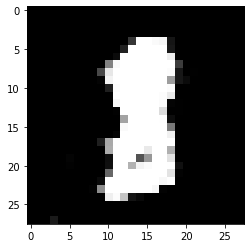

Epoch[51/100] Batch 0/600 Loss D: 1.1229 Loss G: 1.1389
Epoch[51/100] Batch 100/600 Loss D: 1.1733 Loss G: 1.1274
Epoch[51/100] Batch 200/600 Loss D: 1.3586 Loss G: 1.0277
Epoch[51/100] Batch 300/600 Loss D: 1.3734 Loss G: 0.9115
Epoch[51/100] Batch 400/600 Loss D: 1.1764 Loss G: 0.9586
Epoch[51/100] Batch 500/600 Loss D: 1.2641 Loss G: 1.2420
5


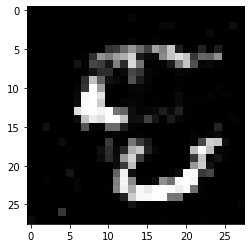

Epoch[52/100] Batch 0/600 Loss D: 1.1975 Loss G: 1.0378
Epoch[52/100] Batch 100/600 Loss D: 1.2088 Loss G: 1.0562
Epoch[52/100] Batch 200/600 Loss D: 1.2204 Loss G: 0.9547
Epoch[52/100] Batch 300/600 Loss D: 1.1350 Loss G: 1.1710
Epoch[52/100] Batch 400/600 Loss D: 1.1348 Loss G: 0.8662
Epoch[52/100] Batch 500/600 Loss D: 1.1964 Loss G: 1.0108
8


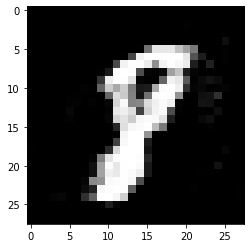

Epoch[53/100] Batch 0/600 Loss D: 1.1813 Loss G: 1.1191
Epoch[53/100] Batch 100/600 Loss D: 1.1766 Loss G: 0.9740
Epoch[53/100] Batch 200/600 Loss D: 1.1913 Loss G: 1.0551
Epoch[53/100] Batch 300/600 Loss D: 1.2962 Loss G: 0.8825
Epoch[53/100] Batch 400/600 Loss D: 1.1748 Loss G: 0.9363
Epoch[53/100] Batch 500/600 Loss D: 1.2547 Loss G: 0.8203
4


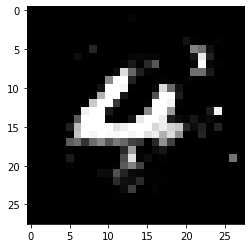

Epoch[54/100] Batch 0/600 Loss D: 1.1255 Loss G: 0.8696
Epoch[54/100] Batch 100/600 Loss D: 1.2312 Loss G: 0.9323
Epoch[54/100] Batch 200/600 Loss D: 1.1434 Loss G: 1.0257
Epoch[54/100] Batch 300/600 Loss D: 1.2550 Loss G: 0.9615
Epoch[54/100] Batch 400/600 Loss D: 1.1090 Loss G: 0.9826
Epoch[54/100] Batch 500/600 Loss D: 1.1901 Loss G: 1.0114
7


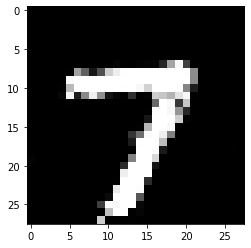

Epoch[55/100] Batch 0/600 Loss D: 1.1873 Loss G: 1.0795
Epoch[55/100] Batch 100/600 Loss D: 1.3205 Loss G: 0.9500
Epoch[55/100] Batch 200/600 Loss D: 1.2010 Loss G: 1.0005
Epoch[55/100] Batch 300/600 Loss D: 1.2619 Loss G: 0.8395
Epoch[55/100] Batch 400/600 Loss D: 1.2414 Loss G: 0.8754
Epoch[55/100] Batch 500/600 Loss D: 1.2473 Loss G: 1.0569
6


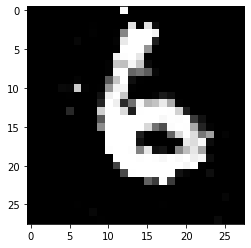

Epoch[56/100] Batch 0/600 Loss D: 1.2897 Loss G: 1.1008
Epoch[56/100] Batch 100/600 Loss D: 1.3698 Loss G: 0.8836
Epoch[56/100] Batch 200/600 Loss D: 1.2454 Loss G: 0.9515
Epoch[56/100] Batch 300/600 Loss D: 1.2577 Loss G: 0.8866
Epoch[56/100] Batch 400/600 Loss D: 1.1705 Loss G: 0.8552
Epoch[56/100] Batch 500/600 Loss D: 1.1492 Loss G: 1.1051
9


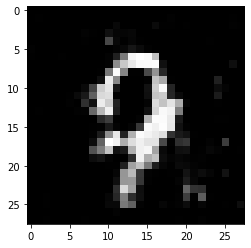

Epoch[57/100] Batch 0/600 Loss D: 1.1836 Loss G: 0.9144
Epoch[57/100] Batch 100/600 Loss D: 1.2010 Loss G: 1.1039
Epoch[57/100] Batch 200/600 Loss D: 1.2149 Loss G: 1.0263
Epoch[57/100] Batch 300/600 Loss D: 1.2461 Loss G: 1.0886
Epoch[57/100] Batch 400/600 Loss D: 1.1723 Loss G: 0.9835
Epoch[57/100] Batch 500/600 Loss D: 1.2723 Loss G: 0.9957
6


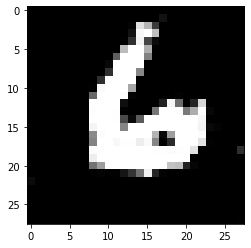

Epoch[58/100] Batch 0/600 Loss D: 1.3263 Loss G: 0.9814
Epoch[58/100] Batch 100/600 Loss D: 1.1872 Loss G: 1.0267
Epoch[58/100] Batch 200/600 Loss D: 1.2343 Loss G: 1.1945
Epoch[58/100] Batch 300/600 Loss D: 1.1967 Loss G: 0.9210
Epoch[58/100] Batch 400/600 Loss D: 1.2154 Loss G: 0.9229
Epoch[58/100] Batch 500/600 Loss D: 1.2247 Loss G: 0.8364
2


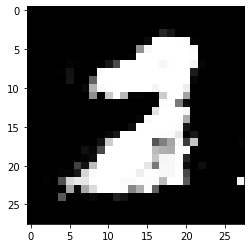

Epoch[59/100] Batch 0/600 Loss D: 1.3076 Loss G: 0.9023
Epoch[59/100] Batch 100/600 Loss D: 1.1457 Loss G: 0.9036
Epoch[59/100] Batch 200/600 Loss D: 1.2154 Loss G: 0.9743
Epoch[59/100] Batch 300/600 Loss D: 1.1477 Loss G: 1.1252
Epoch[59/100] Batch 400/600 Loss D: 1.1897 Loss G: 0.8887
Epoch[59/100] Batch 500/600 Loss D: 1.2799 Loss G: 0.8677
5


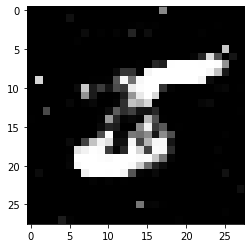

Epoch[60/100] Batch 0/600 Loss D: 1.2103 Loss G: 0.9634
Epoch[60/100] Batch 100/600 Loss D: 1.1928 Loss G: 0.9621
Epoch[60/100] Batch 200/600 Loss D: 1.1303 Loss G: 1.0272
Epoch[60/100] Batch 300/600 Loss D: 1.2457 Loss G: 0.9416
Epoch[60/100] Batch 400/600 Loss D: 1.2284 Loss G: 0.9061
Epoch[60/100] Batch 500/600 Loss D: 1.1664 Loss G: 1.0712
2


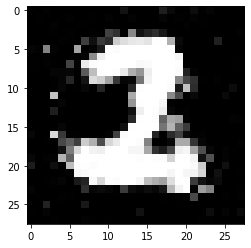

Epoch[61/100] Batch 0/600 Loss D: 1.2514 Loss G: 1.0380
Epoch[61/100] Batch 100/600 Loss D: 1.2369 Loss G: 0.9233
Epoch[61/100] Batch 200/600 Loss D: 1.2093 Loss G: 1.0590
Epoch[61/100] Batch 300/600 Loss D: 1.2936 Loss G: 1.0070
Epoch[61/100] Batch 400/600 Loss D: 1.4191 Loss G: 0.9015
Epoch[61/100] Batch 500/600 Loss D: 1.3294 Loss G: 0.8128
5


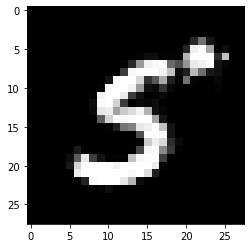

Epoch[62/100] Batch 0/600 Loss D: 1.2625 Loss G: 1.0359
Epoch[62/100] Batch 100/600 Loss D: 1.2832 Loss G: 0.9334
Epoch[62/100] Batch 200/600 Loss D: 1.2610 Loss G: 0.9107
Epoch[62/100] Batch 300/600 Loss D: 1.3238 Loss G: 0.7917
Epoch[62/100] Batch 400/600 Loss D: 1.3171 Loss G: 1.0255
Epoch[62/100] Batch 500/600 Loss D: 1.3203 Loss G: 0.8464
4


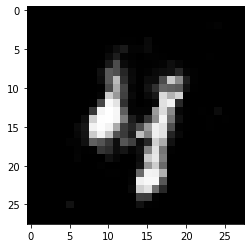

Epoch[63/100] Batch 0/600 Loss D: 1.2479 Loss G: 0.9749
Epoch[63/100] Batch 100/600 Loss D: 1.2511 Loss G: 0.9911
Epoch[63/100] Batch 200/600 Loss D: 1.3216 Loss G: 0.7962
Epoch[63/100] Batch 300/600 Loss D: 1.2368 Loss G: 0.8372
Epoch[63/100] Batch 400/600 Loss D: 1.2334 Loss G: 0.8864
Epoch[63/100] Batch 500/600 Loss D: 1.1113 Loss G: 1.0774
3


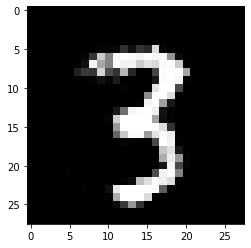

Epoch[64/100] Batch 0/600 Loss D: 1.2510 Loss G: 0.9940
Epoch[64/100] Batch 100/600 Loss D: 1.2211 Loss G: 0.9977
Epoch[64/100] Batch 200/600 Loss D: 1.2469 Loss G: 0.9743
Epoch[64/100] Batch 300/600 Loss D: 1.3184 Loss G: 0.8723
Epoch[64/100] Batch 400/600 Loss D: 1.2354 Loss G: 0.9059
Epoch[64/100] Batch 500/600 Loss D: 1.2100 Loss G: 0.9040
3


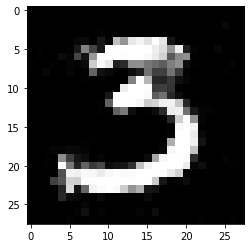

Epoch[65/100] Batch 0/600 Loss D: 1.2775 Loss G: 0.9057
Epoch[65/100] Batch 100/600 Loss D: 1.2314 Loss G: 0.9006
Epoch[65/100] Batch 200/600 Loss D: 1.3107 Loss G: 0.8875
Epoch[65/100] Batch 300/600 Loss D: 1.1687 Loss G: 0.9352
Epoch[65/100] Batch 400/600 Loss D: 1.3563 Loss G: 0.9288
Epoch[65/100] Batch 500/600 Loss D: 1.2777 Loss G: 0.8213
1


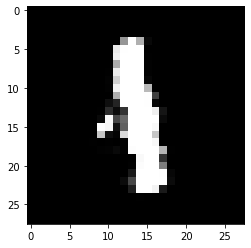

Epoch[66/100] Batch 0/600 Loss D: 1.2834 Loss G: 0.8547
Epoch[66/100] Batch 100/600 Loss D: 1.3058 Loss G: 1.0659
Epoch[66/100] Batch 200/600 Loss D: 1.2631 Loss G: 1.0246
Epoch[66/100] Batch 300/600 Loss D: 1.3487 Loss G: 0.9512
Epoch[66/100] Batch 400/600 Loss D: 1.3273 Loss G: 0.9040
Epoch[66/100] Batch 500/600 Loss D: 1.3432 Loss G: 0.9033
4


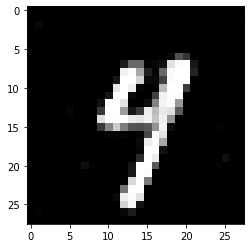

Epoch[67/100] Batch 0/600 Loss D: 1.2692 Loss G: 0.7982
Epoch[67/100] Batch 100/600 Loss D: 1.2424 Loss G: 0.9371
Epoch[67/100] Batch 200/600 Loss D: 1.2434 Loss G: 0.8576
Epoch[67/100] Batch 300/600 Loss D: 1.2204 Loss G: 0.8734
Epoch[67/100] Batch 400/600 Loss D: 1.1978 Loss G: 0.9066
Epoch[67/100] Batch 500/600 Loss D: 1.1655 Loss G: 1.0483
4


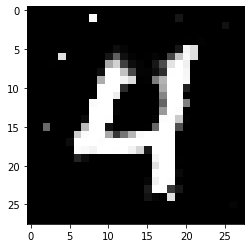

Epoch[68/100] Batch 0/600 Loss D: 1.2388 Loss G: 0.8496
Epoch[68/100] Batch 100/600 Loss D: 1.1466 Loss G: 1.1475
Epoch[68/100] Batch 200/600 Loss D: 1.1719 Loss G: 1.0497
Epoch[68/100] Batch 300/600 Loss D: 1.1056 Loss G: 1.2836
Epoch[68/100] Batch 400/600 Loss D: 1.1794 Loss G: 0.8279
Epoch[68/100] Batch 500/600 Loss D: 1.3035 Loss G: 0.8309
0


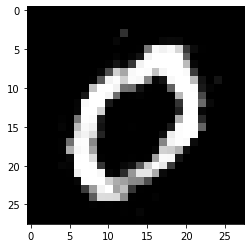

Epoch[69/100] Batch 0/600 Loss D: 1.2423 Loss G: 0.8472
Epoch[69/100] Batch 100/600 Loss D: 1.2993 Loss G: 0.9806
Epoch[69/100] Batch 200/600 Loss D: 1.2071 Loss G: 1.0152
Epoch[69/100] Batch 300/600 Loss D: 1.2284 Loss G: 1.0227
Epoch[69/100] Batch 400/600 Loss D: 1.1470 Loss G: 1.1887
Epoch[69/100] Batch 500/600 Loss D: 1.2523 Loss G: 1.0227
1


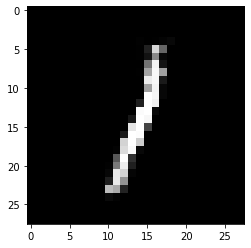

Epoch[70/100] Batch 0/600 Loss D: 1.1886 Loss G: 1.0357
Epoch[70/100] Batch 100/600 Loss D: 1.2707 Loss G: 0.8552
Epoch[70/100] Batch 200/600 Loss D: 1.1619 Loss G: 0.7432
Epoch[70/100] Batch 300/600 Loss D: 1.2968 Loss G: 0.8392
Epoch[70/100] Batch 400/600 Loss D: 1.2421 Loss G: 0.8442
Epoch[70/100] Batch 500/600 Loss D: 1.2453 Loss G: 0.8866
8


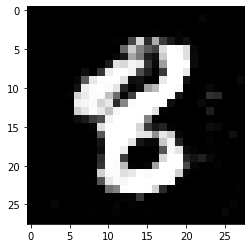

Epoch[71/100] Batch 0/600 Loss D: 1.2994 Loss G: 0.9364
Epoch[71/100] Batch 100/600 Loss D: 1.2639 Loss G: 0.8872
Epoch[71/100] Batch 200/600 Loss D: 1.2379 Loss G: 0.9713
Epoch[71/100] Batch 300/600 Loss D: 1.2284 Loss G: 0.8773
Epoch[71/100] Batch 400/600 Loss D: 1.2745 Loss G: 1.1562
Epoch[71/100] Batch 500/600 Loss D: 1.3446 Loss G: 0.7928
9


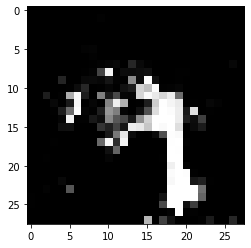

Epoch[72/100] Batch 0/600 Loss D: 1.2911 Loss G: 0.8185
Epoch[72/100] Batch 100/600 Loss D: 1.2589 Loss G: 0.9850
Epoch[72/100] Batch 200/600 Loss D: 1.1977 Loss G: 0.9607
Epoch[72/100] Batch 300/600 Loss D: 1.2799 Loss G: 0.7964
Epoch[72/100] Batch 400/600 Loss D: 1.2663 Loss G: 0.8338
Epoch[72/100] Batch 500/600 Loss D: 1.1906 Loss G: 0.8990
0


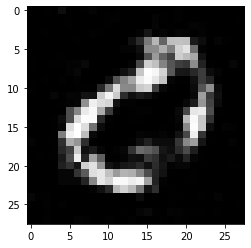

Epoch[73/100] Batch 0/600 Loss D: 1.2796 Loss G: 0.9675
Epoch[73/100] Batch 100/600 Loss D: 1.2347 Loss G: 0.8668
Epoch[73/100] Batch 200/600 Loss D: 1.2371 Loss G: 0.8943
Epoch[73/100] Batch 300/600 Loss D: 1.2645 Loss G: 0.9305
Epoch[73/100] Batch 400/600 Loss D: 1.1724 Loss G: 0.8243
Epoch[73/100] Batch 500/600 Loss D: 1.3488 Loss G: 1.0391
4


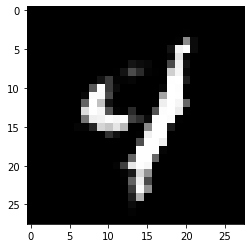

Epoch[74/100] Batch 0/600 Loss D: 1.2908 Loss G: 1.0741
Epoch[74/100] Batch 100/600 Loss D: 1.3397 Loss G: 0.8368
Epoch[74/100] Batch 200/600 Loss D: 1.2725 Loss G: 0.7828
Epoch[74/100] Batch 300/600 Loss D: 1.2989 Loss G: 0.8155
Epoch[74/100] Batch 400/600 Loss D: 1.2007 Loss G: 0.7996
Epoch[74/100] Batch 500/600 Loss D: 1.3267 Loss G: 0.8990
7


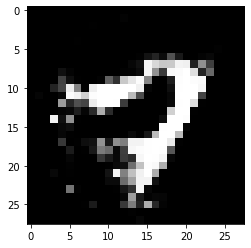

Epoch[75/100] Batch 0/600 Loss D: 1.2653 Loss G: 0.8443
Epoch[75/100] Batch 100/600 Loss D: 1.2109 Loss G: 1.1182
Epoch[75/100] Batch 200/600 Loss D: 1.3904 Loss G: 0.8464
Epoch[75/100] Batch 300/600 Loss D: 1.3543 Loss G: 0.8845
Epoch[75/100] Batch 400/600 Loss D: 1.2907 Loss G: 0.8913
Epoch[75/100] Batch 500/600 Loss D: 1.3470 Loss G: 0.9323
3


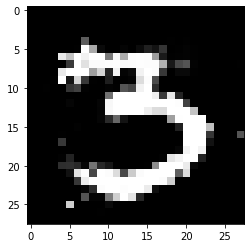

Epoch[76/100] Batch 0/600 Loss D: 1.1950 Loss G: 0.8464
Epoch[76/100] Batch 100/600 Loss D: 1.3213 Loss G: 0.9056
Epoch[76/100] Batch 200/600 Loss D: 1.3878 Loss G: 0.8886
Epoch[76/100] Batch 300/600 Loss D: 1.3034 Loss G: 0.7141
Epoch[76/100] Batch 400/600 Loss D: 1.3057 Loss G: 0.8032
Epoch[76/100] Batch 500/600 Loss D: 1.2698 Loss G: 0.8288
0


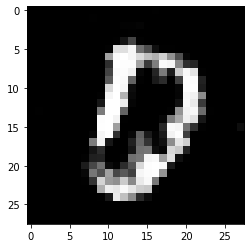

Epoch[77/100] Batch 0/600 Loss D: 1.2875 Loss G: 0.8174
Epoch[77/100] Batch 100/600 Loss D: 1.2741 Loss G: 0.8504
Epoch[77/100] Batch 200/600 Loss D: 1.2290 Loss G: 0.9924
Epoch[77/100] Batch 300/600 Loss D: 1.2584 Loss G: 0.8480
Epoch[77/100] Batch 400/600 Loss D: 1.2805 Loss G: 0.8241
Epoch[77/100] Batch 500/600 Loss D: 1.3201 Loss G: 0.9686
5


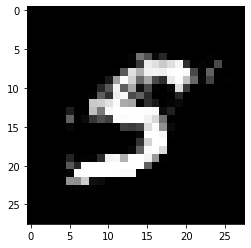

Epoch[78/100] Batch 0/600 Loss D: 1.4132 Loss G: 0.8128
Epoch[78/100] Batch 100/600 Loss D: 1.3021 Loss G: 0.8602
Epoch[78/100] Batch 200/600 Loss D: 1.3027 Loss G: 0.8569
Epoch[78/100] Batch 300/600 Loss D: 1.3021 Loss G: 0.7856
Epoch[78/100] Batch 400/600 Loss D: 1.2443 Loss G: 0.8587
Epoch[78/100] Batch 500/600 Loss D: 1.3712 Loss G: 0.8208
7


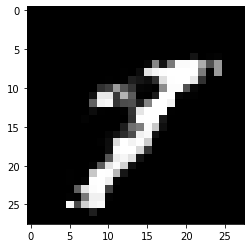

Epoch[79/100] Batch 0/600 Loss D: 1.2401 Loss G: 0.8770
Epoch[79/100] Batch 100/600 Loss D: 1.2856 Loss G: 0.9453
Epoch[79/100] Batch 200/600 Loss D: 1.2363 Loss G: 0.8745
Epoch[79/100] Batch 300/600 Loss D: 1.3628 Loss G: 0.8322
Epoch[79/100] Batch 400/600 Loss D: 1.2499 Loss G: 0.8643
Epoch[79/100] Batch 500/600 Loss D: 1.1976 Loss G: 0.8028
1


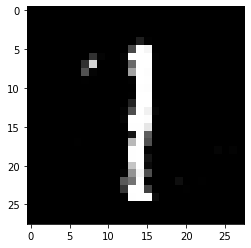

Epoch[80/100] Batch 0/600 Loss D: 1.2606 Loss G: 0.8382
Epoch[80/100] Batch 100/600 Loss D: 1.3215 Loss G: 0.8781
Epoch[80/100] Batch 200/600 Loss D: 1.1285 Loss G: 0.9073
Epoch[80/100] Batch 300/600 Loss D: 1.2485 Loss G: 1.0015
Epoch[80/100] Batch 400/600 Loss D: 1.1492 Loss G: 0.9896
Epoch[80/100] Batch 500/600 Loss D: 1.2465 Loss G: 0.8156
7


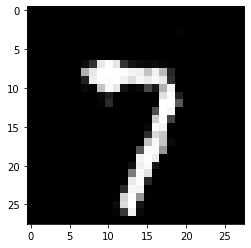

Epoch[81/100] Batch 0/600 Loss D: 1.2281 Loss G: 0.9356
Epoch[81/100] Batch 100/600 Loss D: 1.1769 Loss G: 0.8327
Epoch[81/100] Batch 200/600 Loss D: 1.3055 Loss G: 0.7275
Epoch[81/100] Batch 300/600 Loss D: 1.3004 Loss G: 0.9394
Epoch[81/100] Batch 400/600 Loss D: 1.2056 Loss G: 0.8947
Epoch[81/100] Batch 500/600 Loss D: 1.3295 Loss G: 0.8249
0


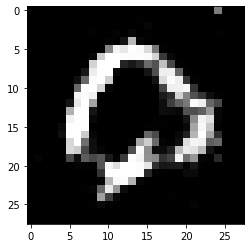

Epoch[82/100] Batch 0/600 Loss D: 1.1440 Loss G: 1.0233
Epoch[82/100] Batch 100/600 Loss D: 1.2377 Loss G: 0.9730
Epoch[82/100] Batch 200/600 Loss D: 1.2558 Loss G: 0.8756
Epoch[82/100] Batch 300/600 Loss D: 1.2699 Loss G: 0.8222
Epoch[82/100] Batch 400/600 Loss D: 1.3142 Loss G: 0.7927
Epoch[82/100] Batch 500/600 Loss D: 1.3883 Loss G: 0.7920
6


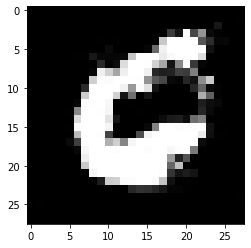

Epoch[83/100] Batch 0/600 Loss D: 1.2937 Loss G: 0.8549
Epoch[83/100] Batch 100/600 Loss D: 1.2427 Loss G: 0.8318
Epoch[83/100] Batch 200/600 Loss D: 1.3658 Loss G: 0.7652
Epoch[83/100] Batch 300/600 Loss D: 1.1661 Loss G: 0.8866
Epoch[83/100] Batch 400/600 Loss D: 1.4606 Loss G: 1.0291
Epoch[83/100] Batch 500/600 Loss D: 1.3866 Loss G: 0.7368
0


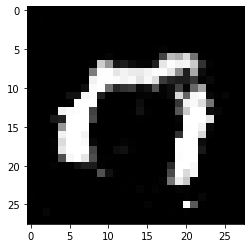

Epoch[84/100] Batch 0/600 Loss D: 1.2941 Loss G: 0.8600
Epoch[84/100] Batch 100/600 Loss D: 1.3877 Loss G: 0.8781
Epoch[84/100] Batch 200/600 Loss D: 1.3190 Loss G: 0.8607
Epoch[84/100] Batch 300/600 Loss D: 1.2615 Loss G: 0.7897
Epoch[84/100] Batch 400/600 Loss D: 1.2645 Loss G: 0.8266
Epoch[84/100] Batch 500/600 Loss D: 1.1772 Loss G: 0.8873
2


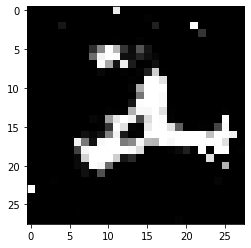

Epoch[85/100] Batch 0/600 Loss D: 1.3180 Loss G: 1.0614
Epoch[85/100] Batch 100/600 Loss D: 1.2029 Loss G: 0.8804
Epoch[85/100] Batch 200/600 Loss D: 1.3055 Loss G: 0.9448
Epoch[85/100] Batch 300/600 Loss D: 1.3318 Loss G: 0.9265
Epoch[85/100] Batch 400/600 Loss D: 1.2836 Loss G: 0.9030
Epoch[85/100] Batch 500/600 Loss D: 1.2020 Loss G: 0.8417
3


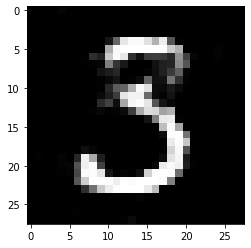

Epoch[86/100] Batch 0/600 Loss D: 1.2574 Loss G: 0.9273
Epoch[86/100] Batch 100/600 Loss D: 1.3020 Loss G: 0.8831
Epoch[86/100] Batch 200/600 Loss D: 1.3015 Loss G: 0.8357
Epoch[86/100] Batch 300/600 Loss D: 1.2654 Loss G: 0.7699
Epoch[86/100] Batch 400/600 Loss D: 1.2534 Loss G: 0.8781
Epoch[86/100] Batch 500/600 Loss D: 1.3218 Loss G: 0.9396
4


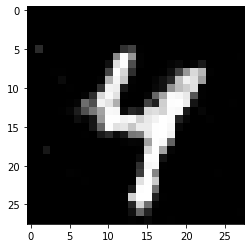

Epoch[87/100] Batch 0/600 Loss D: 1.3030 Loss G: 0.7791
Epoch[87/100] Batch 100/600 Loss D: 1.2790 Loss G: 0.7802
Epoch[87/100] Batch 200/600 Loss D: 1.2645 Loss G: 0.8016
Epoch[87/100] Batch 300/600 Loss D: 1.2692 Loss G: 0.7368
Epoch[87/100] Batch 400/600 Loss D: 1.3175 Loss G: 0.8258
Epoch[87/100] Batch 500/600 Loss D: 1.2464 Loss G: 0.7855
1


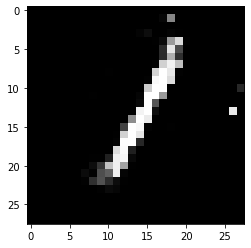

Epoch[88/100] Batch 0/600 Loss D: 1.2652 Loss G: 0.8648
Epoch[88/100] Batch 100/600 Loss D: 1.2178 Loss G: 0.8024
Epoch[88/100] Batch 200/600 Loss D: 1.2979 Loss G: 0.8168
Epoch[88/100] Batch 300/600 Loss D: 1.3688 Loss G: 0.8966
Epoch[88/100] Batch 400/600 Loss D: 1.2711 Loss G: 0.7419
Epoch[88/100] Batch 500/600 Loss D: 1.3374 Loss G: 0.8384
9


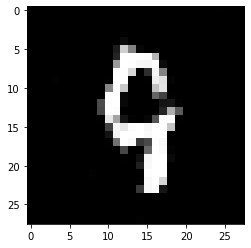

Epoch[89/100] Batch 0/600 Loss D: 1.4084 Loss G: 0.8887
Epoch[89/100] Batch 100/600 Loss D: 1.3525 Loss G: 0.9434
Epoch[89/100] Batch 200/600 Loss D: 1.3356 Loss G: 0.8092
Epoch[89/100] Batch 300/600 Loss D: 1.3209 Loss G: 0.8834
Epoch[89/100] Batch 400/600 Loss D: 1.2712 Loss G: 0.8123
Epoch[89/100] Batch 500/600 Loss D: 1.3068 Loss G: 0.8189
3


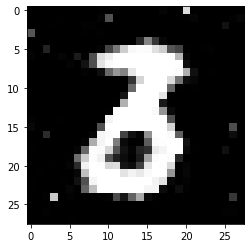

Epoch[90/100] Batch 0/600 Loss D: 1.3788 Loss G: 0.8555
Epoch[90/100] Batch 100/600 Loss D: 1.3726 Loss G: 0.9370
Epoch[90/100] Batch 200/600 Loss D: 1.3558 Loss G: 0.8451
Epoch[90/100] Batch 300/600 Loss D: 1.3295 Loss G: 0.8174
Epoch[90/100] Batch 400/600 Loss D: 1.4154 Loss G: 0.7999
Epoch[90/100] Batch 500/600 Loss D: 1.2935 Loss G: 0.7790
3


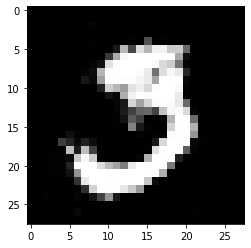

Epoch[91/100] Batch 0/600 Loss D: 1.2863 Loss G: 0.7890
Epoch[91/100] Batch 100/600 Loss D: 1.2866 Loss G: 0.8504
Epoch[91/100] Batch 200/600 Loss D: 1.2952 Loss G: 0.7931
Epoch[91/100] Batch 300/600 Loss D: 1.3604 Loss G: 0.6788
Epoch[91/100] Batch 400/600 Loss D: 1.2884 Loss G: 0.7374
Epoch[91/100] Batch 500/600 Loss D: 1.2866 Loss G: 0.7575
1


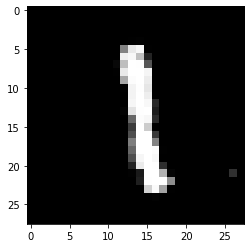

Epoch[92/100] Batch 0/600 Loss D: 1.2864 Loss G: 0.9761
Epoch[92/100] Batch 100/600 Loss D: 1.2916 Loss G: 0.8595
Epoch[92/100] Batch 200/600 Loss D: 1.3111 Loss G: 0.8347
Epoch[92/100] Batch 300/600 Loss D: 1.3312 Loss G: 0.7839
Epoch[92/100] Batch 400/600 Loss D: 1.2800 Loss G: 1.0355
Epoch[92/100] Batch 500/600 Loss D: 1.1262 Loss G: 0.9494
6


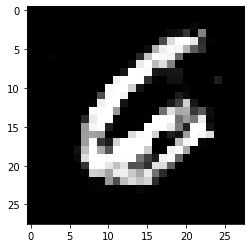

Epoch[93/100] Batch 0/600 Loss D: 1.2723 Loss G: 1.0229
Epoch[93/100] Batch 100/600 Loss D: 1.2102 Loss G: 1.0720
Epoch[93/100] Batch 200/600 Loss D: 1.3182 Loss G: 0.9614
Epoch[93/100] Batch 300/600 Loss D: 1.2163 Loss G: 0.8539
Epoch[93/100] Batch 400/600 Loss D: 1.2256 Loss G: 0.8325
Epoch[93/100] Batch 500/600 Loss D: 1.3302 Loss G: 0.8807
2


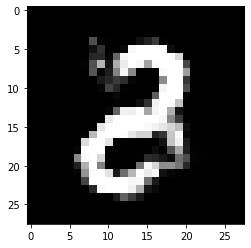

Epoch[94/100] Batch 0/600 Loss D: 1.3218 Loss G: 0.7401
Epoch[94/100] Batch 100/600 Loss D: 1.3430 Loss G: 0.7271
Epoch[94/100] Batch 200/600 Loss D: 1.2877 Loss G: 0.8655
Epoch[94/100] Batch 300/600 Loss D: 1.2551 Loss G: 0.9090
Epoch[94/100] Batch 400/600 Loss D: 1.2735 Loss G: 0.8902
Epoch[94/100] Batch 500/600 Loss D: 1.2496 Loss G: 0.8402
9


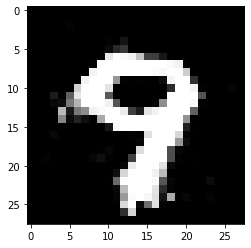

Epoch[95/100] Batch 0/600 Loss D: 1.2878 Loss G: 0.8198
Epoch[95/100] Batch 100/600 Loss D: 1.3178 Loss G: 0.8486
Epoch[95/100] Batch 200/600 Loss D: 1.2558 Loss G: 0.9825
Epoch[95/100] Batch 300/600 Loss D: 1.3085 Loss G: 0.7797
Epoch[95/100] Batch 400/600 Loss D: 1.3409 Loss G: 0.8566
Epoch[95/100] Batch 500/600 Loss D: 1.2896 Loss G: 0.8275
0


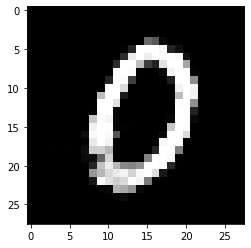

Epoch[96/100] Batch 0/600 Loss D: 1.2871 Loss G: 0.7738
Epoch[96/100] Batch 100/600 Loss D: 1.3380 Loss G: 0.7950
Epoch[96/100] Batch 200/600 Loss D: 1.2570 Loss G: 0.8099
Epoch[96/100] Batch 300/600 Loss D: 1.2513 Loss G: 0.8778
Epoch[96/100] Batch 400/600 Loss D: 1.3330 Loss G: 0.8053
Epoch[96/100] Batch 500/600 Loss D: 1.4024 Loss G: 0.7718
0


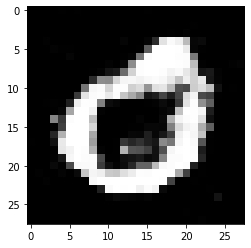

Epoch[97/100] Batch 0/600 Loss D: 1.2163 Loss G: 0.8372
Epoch[97/100] Batch 100/600 Loss D: 1.1814 Loss G: 1.0581
Epoch[97/100] Batch 200/600 Loss D: 1.3114 Loss G: 0.9640
Epoch[97/100] Batch 300/600 Loss D: 1.3238 Loss G: 0.8338
Epoch[97/100] Batch 400/600 Loss D: 1.2755 Loss G: 1.0209
Epoch[97/100] Batch 500/600 Loss D: 1.2787 Loss G: 0.8591
6


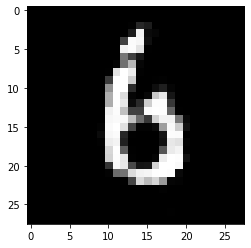

Epoch[98/100] Batch 0/600 Loss D: 1.2550 Loss G: 0.7824
Epoch[98/100] Batch 100/600 Loss D: 1.2860 Loss G: 0.7994
Epoch[98/100] Batch 200/600 Loss D: 1.3486 Loss G: 0.7644
Epoch[98/100] Batch 300/600 Loss D: 1.2002 Loss G: 0.9507
Epoch[98/100] Batch 400/600 Loss D: 1.2152 Loss G: 0.7527
Epoch[98/100] Batch 500/600 Loss D: 1.2929 Loss G: 0.7806
0


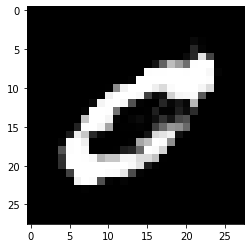

Epoch[99/100] Batch 0/600 Loss D: 1.3087 Loss G: 0.8757
Epoch[99/100] Batch 100/600 Loss D: 1.3407 Loss G: 0.7708
Epoch[99/100] Batch 200/600 Loss D: 1.3455 Loss G: 0.8865
Epoch[99/100] Batch 300/600 Loss D: 1.3346 Loss G: 0.8298
Epoch[99/100] Batch 400/600 Loss D: 1.2754 Loss G: 0.8060
Epoch[99/100] Batch 500/600 Loss D: 1.2689 Loss G: 0.8262
4


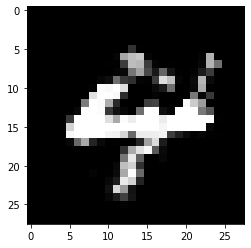

In [24]:
for epoch in range(100):
  for batch_i,(real_img,r_label) in enumerate(train_loader):
    real_img = real_img.view(100,784).to(device)
    digit_label = r_label.to(device)
    fake_label = torch.zeros(100,1).to(device)
    real_label = torch.ones(100,1).to(device)
    fake_labels = torch.randint(0, 10, (100,)).to(device)


    #TRAIN DIS
    D_real = D(real_img, digit_label)
    D_real_loss = criterion(D_real,real_label)

    z= torch.randn(100,100).to(device)
    D_fake = D(G(z,fake_labels),fake_labels)
    D_fake_loss = criterion(D_fake,fake_label)

    D_loss = D_real_loss+D_fake_loss

    d_optimizer.zero_grad()
    D_loss.backward()
    d_optimizer.step()

    #TRAIN GEN
    z= torch.randn(100,100).to(device)
    G_fake = D(G(z,fake_labels),fake_labels)
    G_loss = criterion(G_fake,real_label)

    g_optimizer.zero_grad()
    G_loss.backward()
    g_optimizer.step()

    if batch_i % 100 == 0 :
      print (f"Epoch[{epoch}/100] Batch {batch_i}/{len(train_loader)} Loss D: {D_loss:.4f} Loss G: {G_loss:.4f}"
      )

  with torch.no_grad():
        noise = torch.randn(100,100).to(device)
        fake_labels = torch.randint(0, 10, (100,)).to(device)
        generated_data = G(noise, fake_labels).cpu().view(100, 28, 28)
        for x in generated_data:
            print(fake_labels[0].item())
            plt.imshow(x.detach().numpy(), interpolation='nearest',cmap='gray')
            plt.show()
            break



0


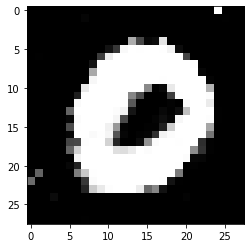

0


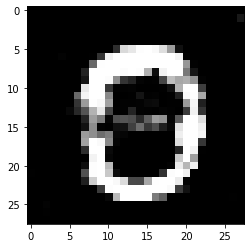

0


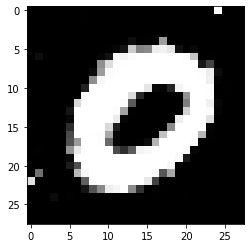

0


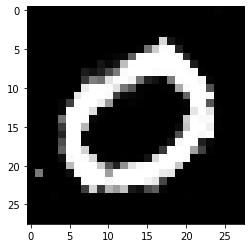

0


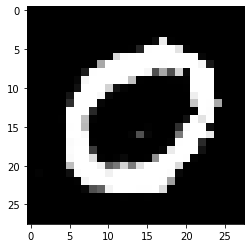

0


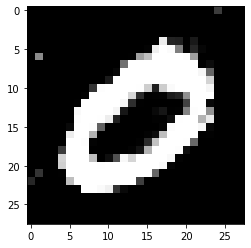

0


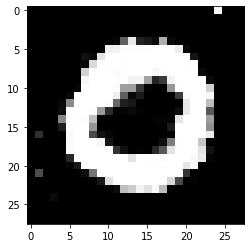

0


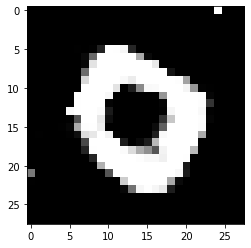

0


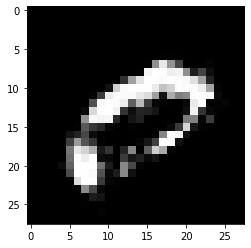

0


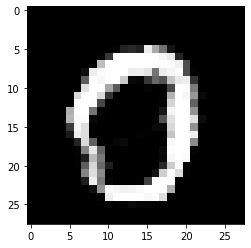

1


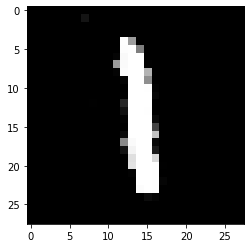

1


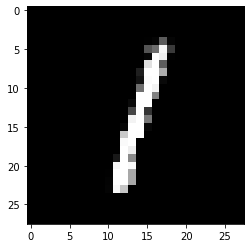

1


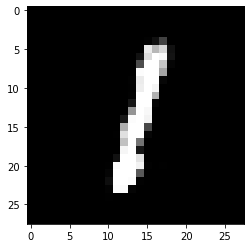

1


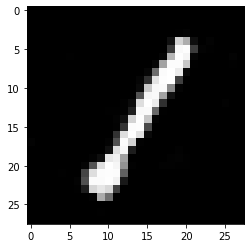

1


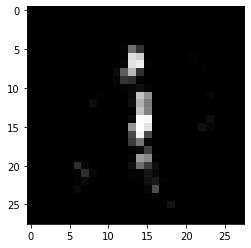

1


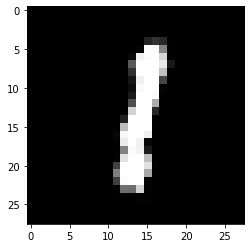

1


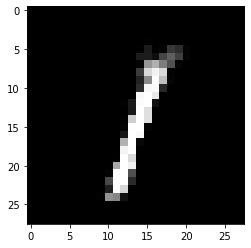

1


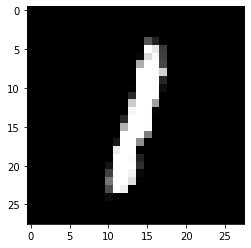

1


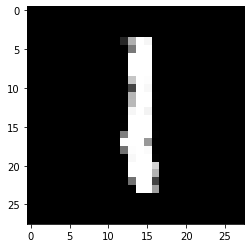

1


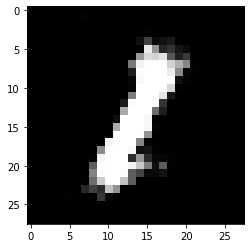

2


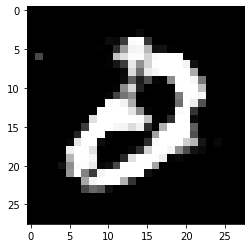

2


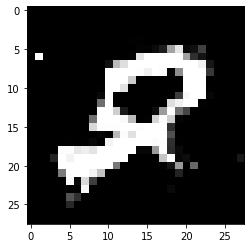

2


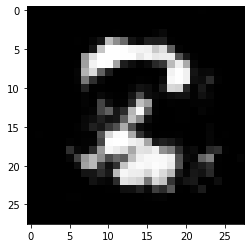

2


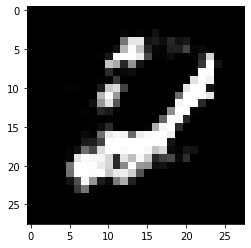

2


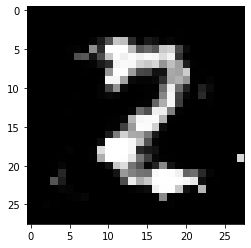

2


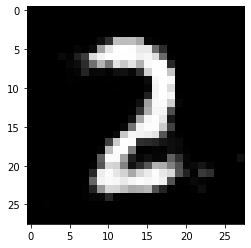

2


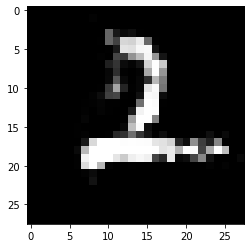

2


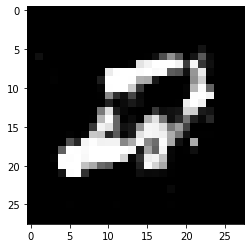

2


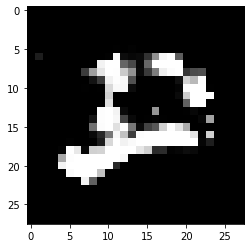

2


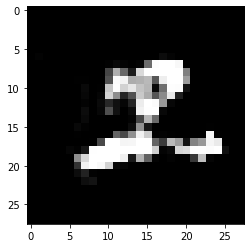

3


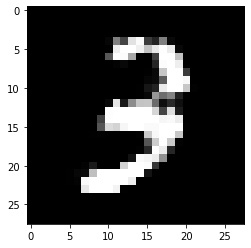

3


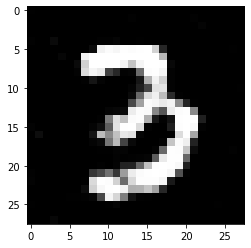

3


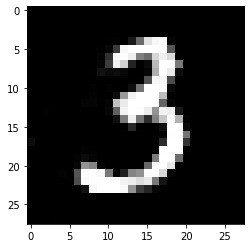

3


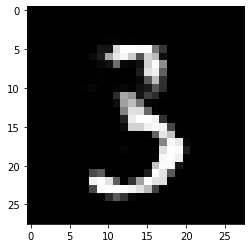

3


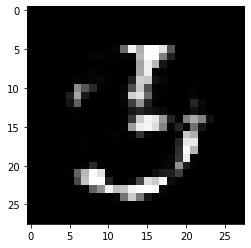

3


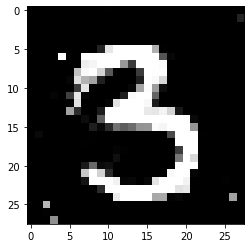

3


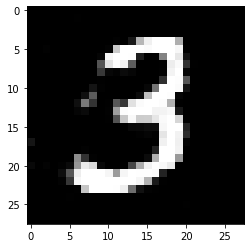

3


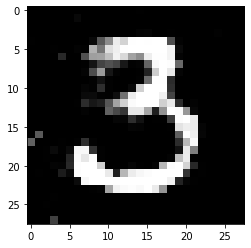

3


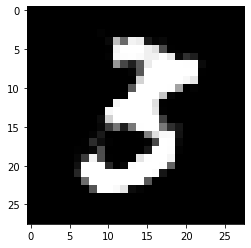

3


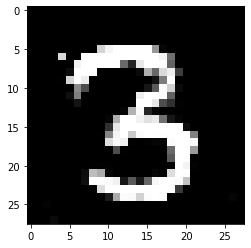

4


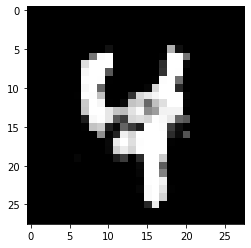

4


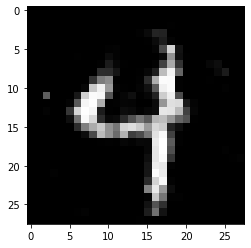

4


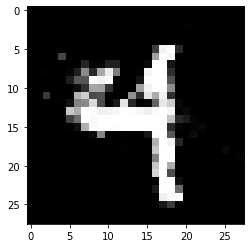

4


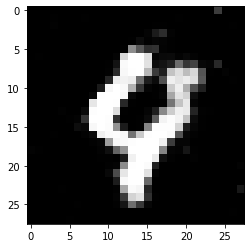

4


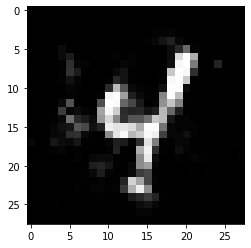

4


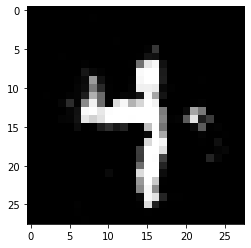

4


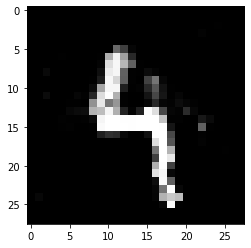

4


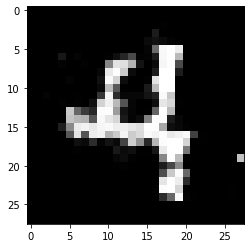

4


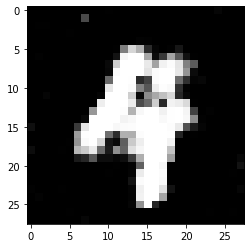

4


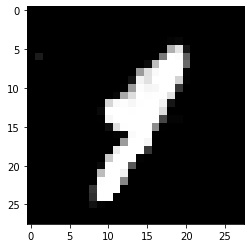

5


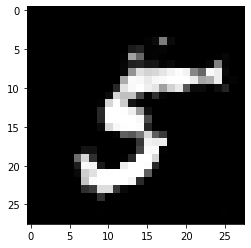

5


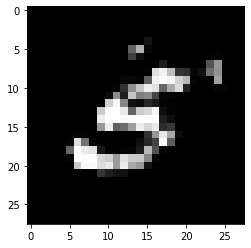

5


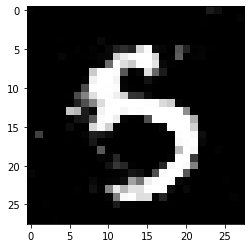

5


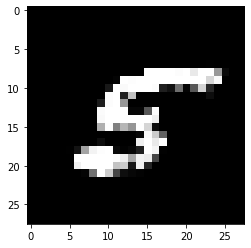

5


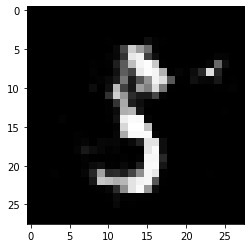

5


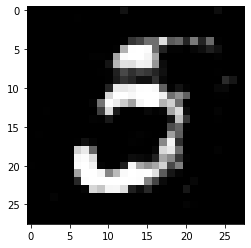

5


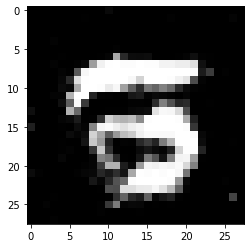

5


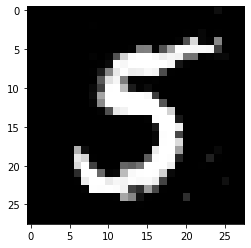

5


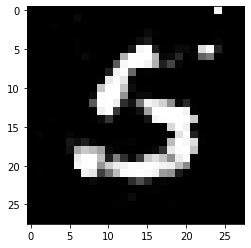

5


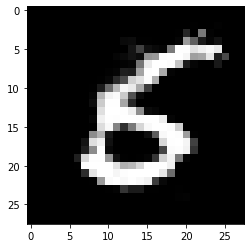

6


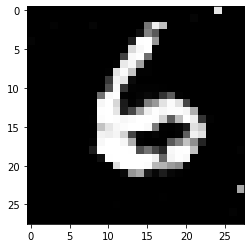

6


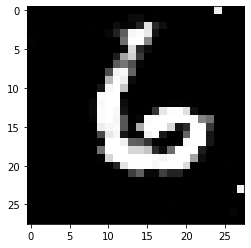

6


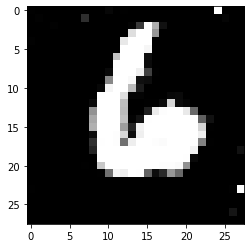

6


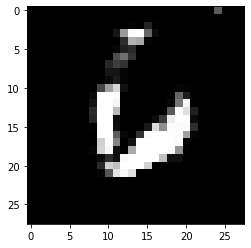

6


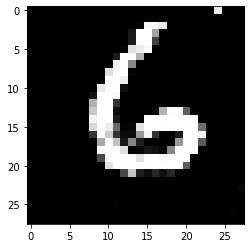

6


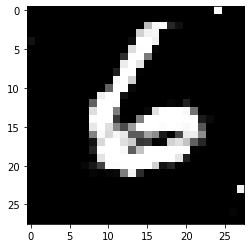

6


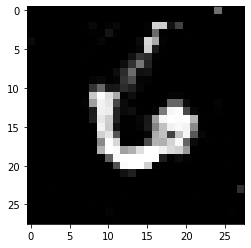

6


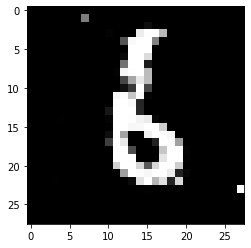

6


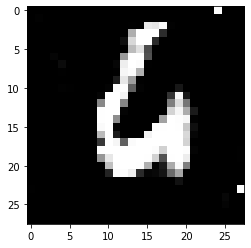

6


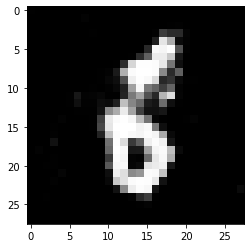

7


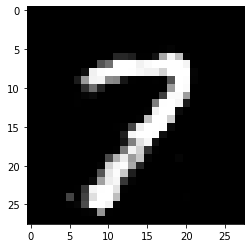

7


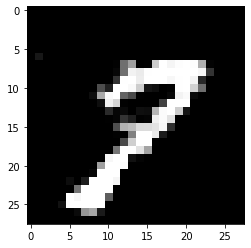

7


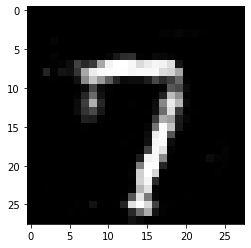

7


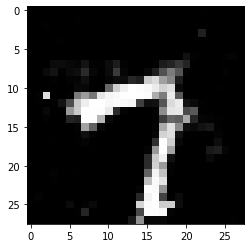

7


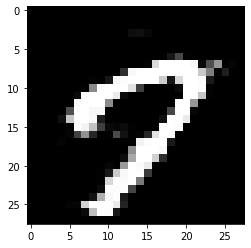

7


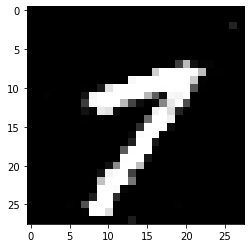

7


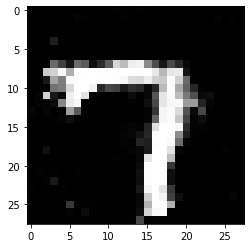

7


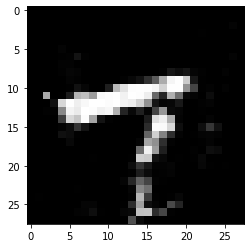

7


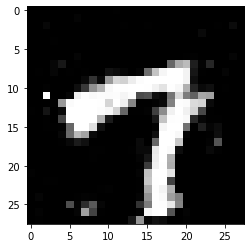

7


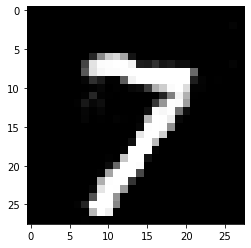

8


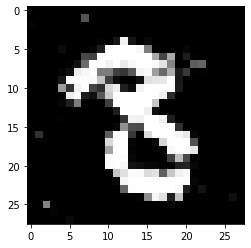

8


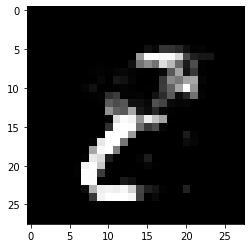

8


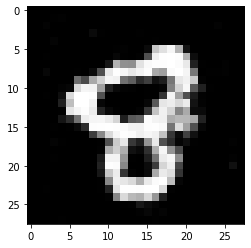

8


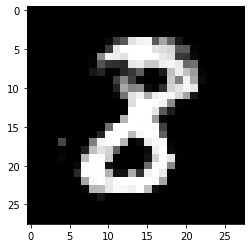

8


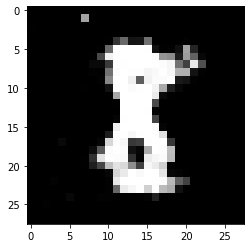

8


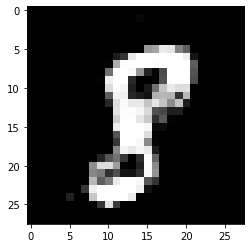

8


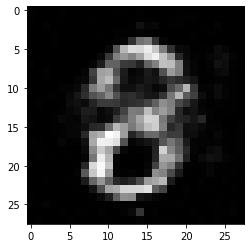

8


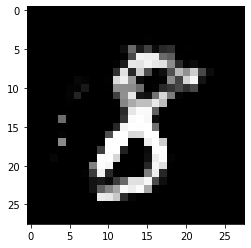

8


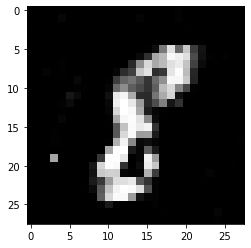

8


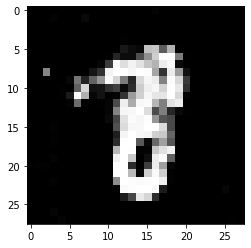

9


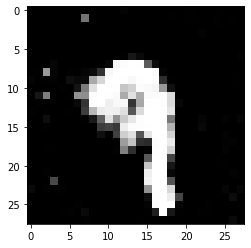

9


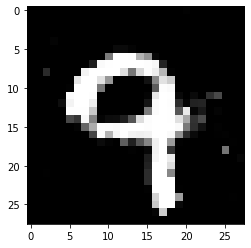

9


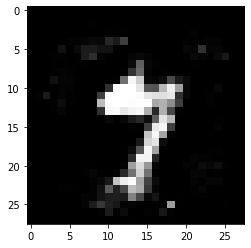

9


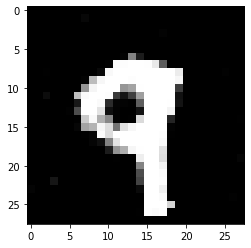

9


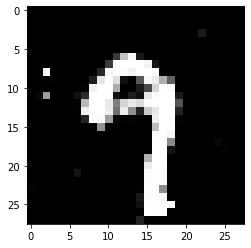

9


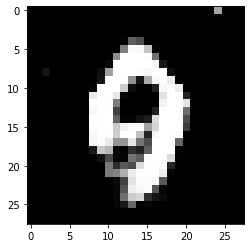

9


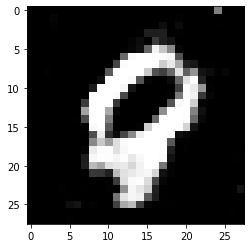

9


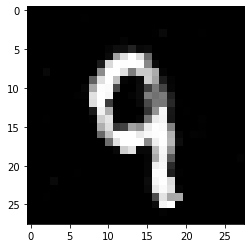

9


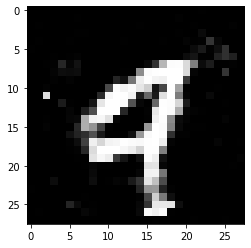

9


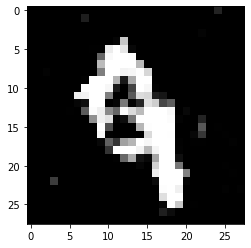

In [50]:

list_img = []
for i in range(10): # nhãn điều kiện y từ 0->9
  noise = torch.randn(100,100).to(device)
  fake_labels = torch.randint(i,i+1, (100,)).to(device)
  generated_data = G(noise, fake_labels).cpu().view(100, 28, 28)
  index = 0;
  for x in generated_data:
      print(fake_labels[0].item())
      index+=1
      list_img.append(x)
      plt.imshow(x.detach().cpu().numpy(), interpolation='nearest',cmap='gray')
      plt.show()
      if index == 10: break